# Introduction

What we've introduced in chapter 5~8, are all value-based methods, among which Q-learning deals with finite states, DQN and improved DQN can be used for descrete states. In RL, desipte value-based methods, there exists another powerful branch: policy-based methods. The difference is that, value-base dmethods learn the value functions and then lead to a policy accordingly, during which there does not exist a explicit policy, while policy-based methods directly learn a policy explicitly. Policy Gradient (PG) is a method belongs to policy-based methods. 

# Policy Gradient

In PG and other policy-based methods, the idea is to parameterize the policy. Assume the target policy $\pi_\theta$ is a stochastic policy and is differentiable everywhere in its domain, among which $\theta$ is the set of all the parameters of the policy. We can use a linear or neural network to model the policy by outputing a distribution of actions given a state as input. The objective of the training is to find the optimal policy and maximize the expected return of this optimal policy in the environment: $$J(\theta) = \mathbb{E}_{s_0}[V^{\pi_\theta}(s_0)], $$ where $s_0$ represents the inital state. 

Now that we have the objective, we can differentiate $J(\theta)$ and adopt gradent ascent to maximize $J(\theta)$ for optimality. 

$$\nabla_\theta V^{\pi_\theta}(s) = \nabla_\theta (\sum_{a \in \mathcal{A}} \pi_\theta(a|s) Q^{\pi_\theta}(s, a)) \\ \quad = \sum_{a \in \mathcal{A}} (\nabla_\theta \pi_\theta(a|s) Q^{\pi_\theta}(s, a) +\pi_\theta(a|s)  \nabla_\theta Q^{\pi_\theta}(s, a)) \\ \quad = \sum_{a \in \mathcal{A}} (\nabla_\theta \pi_\theta(a|s) Q^{\pi_\theta}(s, a) +\pi_\theta(a|s)  \nabla_\theta \sum_{s', r}p(s', r|s, a)(r + \gamma V^{\pi_\theta}(s'))) \\ \quad = \sum_{a \in \mathcal{A}} (\nabla_\theta \pi_\theta(a|s) Q^{\pi_\theta}(s, a) +\gamma \pi_\theta(a|s)  \nabla_\theta \sum_{s', r}p(s', r|s, a)V^{\pi_\theta}(s')) \\ \quad = \sum_{a \in \mathcal{A}} (\nabla_\theta \pi_\theta(a|s) Q^{\pi_\theta}(s, a) +\gamma \pi_\theta(a|s)  \nabla_\theta \sum_{s'}p(s'|s, a)V^{\pi_\theta}(s'))$$

For simplification, let $\phi(s) = \sum_{a \in \mathcal{A}} \nabla_\theta \pi_\theta(a|s) Q^{\pi_\theta}(s, a)$, we have:
$$\nabla_\theta V^{\pi_\theta}(s) = \phi(s) +  \gamma \sum_{a} \pi_\theta(a|s)  \nabla_\theta \sum_{s'}p(s'|s, a)V^{\pi_\theta}(s') \\ \quad = \phi(s) +  \gamma \sum_{a} \sum_{s'} \pi_\theta(a|s) p(s'|s, a) \nabla_\theta V^{\pi_\theta}(s') $$

Define $d^{\pi_\theta}(s \rightarrow k, x)$ be the probability of policy $\pi_\theta$ start from state $s$ to state $x$ after $k$ steps, we have:
$$\nabla_\theta V^{\pi_\theta}(s) = \phi(s) +  \gamma \sum_{a} \sum_{s'} d^{\pi_\theta}(s \rightarrow 1, s') \nabla_\theta V^{\pi_\theta}(s') \\ \quad = \phi(s)+  \gamma \sum_{a} \sum_{s'} d^{\pi_\theta}(s \rightarrow 1, s') [\phi(s') +  \gamma \sum_{a'} \sum_{s''} d^{\pi_\theta}(s' \rightarrow 1, s'') \nabla_\theta V^{\pi_\theta}(s'') ] \\ \quad = \phi(s) +  \gamma \sum_{s'} d^{\pi_\theta}(s \rightarrow 1, s') \phi(s') +  \gamma^2 \sum_{s} d^{\pi_\theta}(s \rightarrow 2, s'') \nabla_\theta V^{\pi_\theta}(s'') \\ \quad = \phi(s) +  \gamma \sum_{s'} d^{\pi_\theta}(s \rightarrow 1, s')\phi(s') +  \gamma^2 \sum_{s''} d^{\pi_\theta}(s \rightarrow 2, s'') \phi(s'') + \gamma^3 \sum_{s'''} d^{\pi_\theta}(s \rightarrow 3, s''') \nabla_\theta V^{\pi_\theta}(s''') \\ \quad = ... \\ \quad = \sum_{x \in \mathcal{S}} \sum_{k=0}^\infty \gamma^k d^{\pi_\theta}(s \rightarrow k, x) \phi(x)$$

Let $\eta(s) = \mathbb{E}_{s_0} [\sum_{k=0}^\infty \gamma^k d^{\pi_\theta}(s_0 \rightarrow k, x)]$ and recall in chapter 3 we have $\nu^{\pi}(s) = (1-\gamma) \sum_{t=0}^\infty \gamma^t P^{\pi}_t(s) = \frac{\eta(s)}{\sum_s \eta(s)}$, we have

$$\nabla_\theta J(\theta) = \mathbb{E}_{s_0}[V^{\pi_\theta}(s_0)] \\ \quad = \mathbb{E}_{s_0}[\sum_{x \in \mathcal{S}} \sum_{k=0}^\infty \gamma^k d^{\pi_\theta}(s_0 \rightarrow k, x) \phi(x)] \\ \quad = \sum_{s} \mathbb{E}_{s_0}[\sum_{k=0}^\infty \gamma^k d^{\pi_\theta}(s_0 \rightarrow k, s)] \phi(s) \\ \quad = \sum_{s} \eta(s)\phi(s) \\ \quad = (\sum_{s} \eta(s)) \sum_{s} \frac{\eta(s)}{\sum_{s}\eta(s)} \phi(s) \\ \propto \sum_{s} \frac{\eta(s)}{\sum_{s}\eta(s)} \phi(s) \\ \quad = \sum_{s} \nu(s) \phi(s) \\ \quad = \sum_{s} \nu(s) \sum_{a} \nabla_\theta \pi_\theta(a|s) Q^{\pi_\theta}(s, a)$$

Hence, we have: 

$$\nabla_\theta J(\theta) \propto \sum_{s} \nu(s) \sum_{a} \nabla_\theta \pi_\theta(a|s) Q^{\pi_\theta}(s, a) \\ \quad = \sum_{s} \nu(s) \sum_{a} \pi_\theta(a|s)Q^{\pi_\theta}(s, a) \frac{\nabla_\theta \pi_\theta(a|s) }{ \pi_\theta(a|s) } \\ \quad = \mathbb{E}_{\pi_{\theta}}[Q^{\pi_\theta}(s, a) \nabla_\theta \log(\pi_\theta(a|s))]$$


By the inference above, we can see that $\nabla_\theta J(\theta) \propto \mathbb{E}_{\pi_{\theta}}[Q^{\pi_\theta}(s, a) \nabla_\theta \log(\pi_\theta(a|s))]$ can be used to update the gradient. Notice that the expectation is taken with respect to $\mathbb{E}_{\pi_{\theta}}$, so gradient policy algorithm is on-policy, which means you have to use the data sampled based on current policy for the update. 

A direct understanding to this update formula is that, the policy is encouraged to sample data that brings more value. 

In torch, we can easily implement $\nabla_\theta log(\pi_\theta(a|s))$, but what about $Q^{\pi_\theta}(s,a)$? The PG algorithm we introduce below, the REINFORCE algorithm, estimates it by MC. For a finite-step env, REINFORCE gives us $Q^{\pi_\theta}(s,a) = \sum_{t=1}^T (\sum_{t'=t}^T \gamma^{t'-t} r_{t'})$, where $T$ is the maximal steps allowed.

The REINFORCE algorithm can be written as: 
- Init $\theta$
- for episode $e = 1$ to $E$:
    - sample a trajectory $\{s_1, a_1, r_1, s_2, a_2, r_2, ..., s_T, a_T, r_T\}$ under current policy $\pi_\theta$
    - calculate the return of each timestep $\psi_t = \sum_{t'=t}^T \gamma^{t'-t} r_{t'}$
    - $\theta \leftarrow \theta + \alpha \sum_t^T \psi_t \nabla_\theta log(\pi_\theta(a|s))$
- end for

Now, let us implement it in the CartPole env.

In [2]:
import numpy as np
np.bool8 = np.bool_
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm
import rl_utils

In [26]:
class PolicyNet(nn.Module):
    # TODO: implement policy net, with input states and output distribution of actions
    def __init__(self, input_dim, hidden_dim, acton_dim):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, acton_dim)

    def forward(self, x):
        h = F.relu(self.fc1(x))
        return F.softmax(self.fc2(h), dim=1)

In [49]:
class REINFORCE:
    def __init__(self, state_dim, hidden_dim, action_dim, learning_rate, gamma, device):
        self.policy_net = PolicyNet(state_dim, hidden_dim, action_dim).to(device)
        self.optimizer = torch.optim.Adam(self.policy_net.parameters(), lr=learning_rate)  # 使用Adam优化器
        self.gamma = gamma  # 折扣因子
        self.device = device

    def take_action(self, state):  # 根据动作概率分布随机采样
        # TODO: sample action from distribution
        state = torch.Tensor([state], device=self.device)
        probs = self.policy_net(state)
        action_dist = torch.distributions.Categorical(probs)
        action = action_dist.sample()
        return action.item()

    def update(self, transition_dict):
        # TODO: update the policy
        states = torch.tensor(transition_dict["states"])
        actions = torch.tensor(transition_dict["actions"])
        rewards = torch.tensor(transition_dict["rewards"])

        self.optimizer.zero_grad()

        G = 0
        returns = []
        for r in reversed(rewards):
            G = self.gamma * G + r
            returns.append(G)
        returns = list(reversed(returns))
        returns = torch.tensor(returns)
        probs = torch.distributions.Categorical(self.policy_net(states)).log_prob(actions)
        
        loss = -(returns *probs).sum()
        # for s, a, r in zip(reversed(states), reversed(actions), reversed(rewards)):
        #     s = s.view(1, -1)
        #     a = torch.Tensor([a], device=self.device).view(-1, 1)
        #     G = r + self.gamma * G
        #     probs = self.policy_net(s).gather(1, a.long()) 
        #     loss -= torch.log(probs) * G

        loss.backward()
        self.optimizer.step()

In [50]:
learning_rate = 1e-3
num_episodes = 1000
hidden_dim = 128
gamma = 0.98
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")

env_name = "CartPole-v0"
env = gym.make(env_name)
# env.seed(0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = REINFORCE(state_dim, hidden_dim, action_dim, learning_rate, gamma,
                  device)

return_list = []
for i in range(10):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):
            episode_return = 0
            transition_dict = {
                'states': [],
                'actions': [],
                'next_states': [],
                'rewards': [],
                'terminated': [],
                'truncated': []
            }
            state, _ = env.reset()
            done = False
            while not done:
                action = agent.take_action(state)
                next_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated

                transition_dict['states'].append(state)
                transition_dict['actions'].append(action)
                transition_dict['next_states'].append(next_state)
                transition_dict['rewards'].append(reward)
                transition_dict['terminated'].append(terminated)
                transition_dict['truncated'].append(truncated)
                
                state = next_state
                episode_return += reward
            return_list.append(episode_return)
            agent.update(transition_dict)
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

/Users/jessiewang/Desktop/experiments/rl_learning/.venv/lib/python3.12/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
Iteration 9: 100%|██████████| 100/100 [00:01<00:00, 81.13it/s, episode=1000, return=200.000]


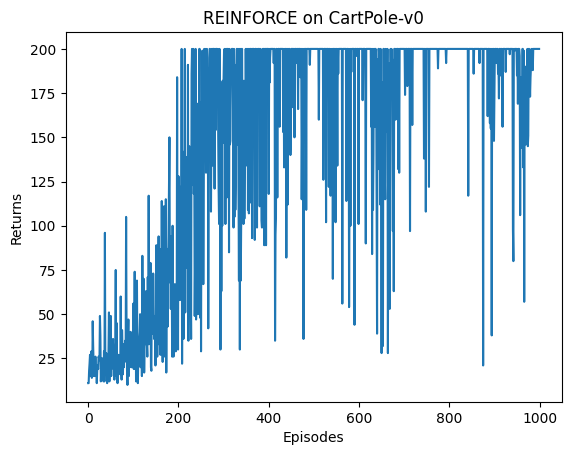

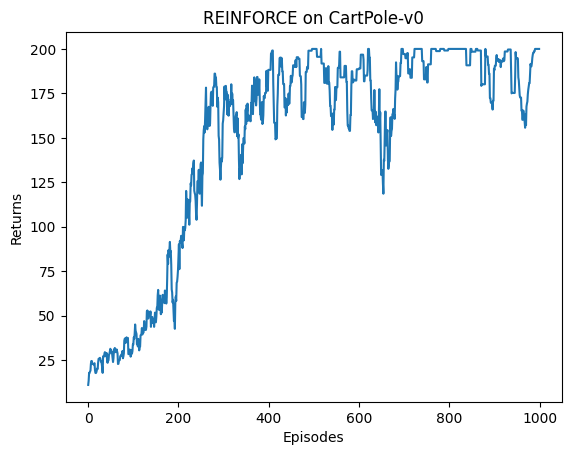

In [51]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('REINFORCE on {}'.format(env_name))
plt.show()

mv_return = rl_utils.moving_average(return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('REINFORCE on {}'.format(env_name))
plt.show()

As we can see, with the number of sampled data increasing, REINFORCE is able to learn the optimal policy. However, compared to DQN, REINFORCE has higher sample complexity since it is on-policy. Besides, the fluctuations of REINFORCE is relatively high, as the return of trajectories sampled could vary a lot. 

# Summary
REINFORCE is typical in PG, even in RL, where the agent interacts with the env guided by current policy, calculates the gradient of the policy directly, and then optimize the policy. This method learns from interaction and directly updates the policy, which is more straitforward than value-based methods such as TD-error based ones. REINFORCE theoratically guarantees local optimum by MC sampling which provided unbiased gradient estimation. However, it is also MC which introduce the high variance, a problem we will see how to solve by actor-critic.